Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-11-05 21:36:27--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-11-05 21:36:27--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-11-05 21:36:27 (73.8 MB/s) - ‘

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [21]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [22]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

In [23]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [24]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



Es importante normalizar los datos para que todas las variables estén en la misma escala, ya que K-means es sensible a las diferencias en las magnitudes de las variables.
Si una variable tiene valores mucho más grandes que las otras, puede afectar la formación de los grupos

In [25]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


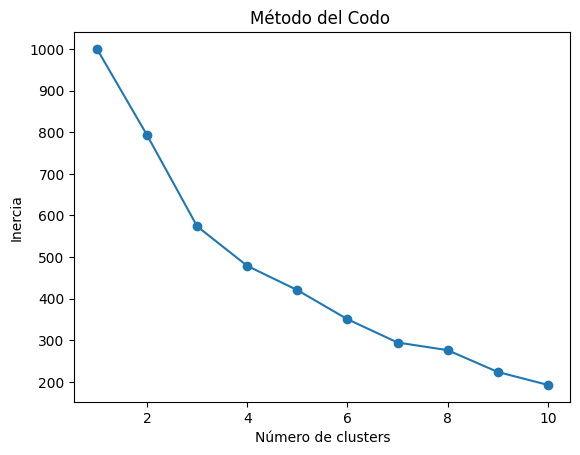

In [32]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Graficamos los resultados
plt.plot(range(1, 11), inertia,marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo ')
plt.show()


Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

El codo parece formarse en el punto k = 3, ya que a partir de ese valor la reducción de la inercia comienza a ser menos significativa.
Por lo tanto, el número de clusters más apropiado para este ejercicio sería 3.

Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [42]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_data)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,1
1,2,0,21,15,81,1
2,3,1,20,16,6,1
3,4,1,23,16,77,1
4,5,1,31,17,40,1


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

In [39]:
data['Cluster'].value_counts()

,count
Cluster,
2,80
0,64
1,56


Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [43]:
# Agrupamos los datos por cluster y calculamos los promedios
cluster_description = data.groupby('Cluster').mean()

# Mostramos la descripción de cada cluster
cluster_description


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,72.343750,0.531250,54.437500,49.031250,40.140625
1,48.214286,0.660714,25.910714,37.803571,58.714286
2,159.625000,0.512500,35.437500,85.712500,52.287500


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



**Cluster 0:** Está compuesto principalmente por clientes de mayor edad (promedio 54 años), con un nivel de ingreso medio (49 k$) y un puntaje de gasto bajo (40).
Este grupo se caracteriza por ser más conservador al comprar y gastar menos, probablemente porque priorizan el ahorro o realizan compras más planificadas.

**Cluster 1:** Agrupa a clientes jóvenes (26 años en promedio), con ingresos bajos (38 k$) pero un puntaje de gasto alto (59).
Son clientes que disfrutan comprar y consumen con más frecuencia a pesar de no tener altos ingresos.

**Cluster 2:** Está formado por clientes adultos (35 años en promedio) con ingresos altos (86 k$) y un puntaje de gasto medio (52).
Representan consumidores con buena capacidad económica, que mantienen un nivel de gasto equilibrado y racional.

Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

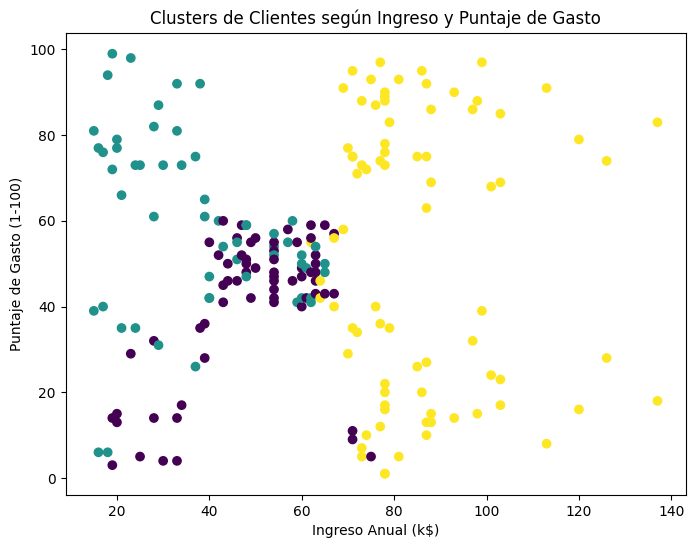

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'])
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.title('Clusters de Clientes según Ingreso y Puntaje de Gasto')
plt.show()

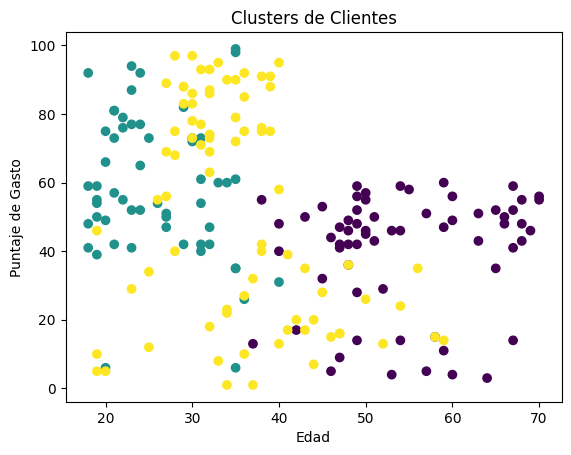

In [44]:
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['Cluster'])
plt.xlabel('Edad')
plt.ylabel('Puntaje de Gasto')
plt.title('Clusters de Clientes')
plt.show()

Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

En la gráfica de Ingreso Anual vs Puntaje de Gasto, se observa una segmentación clara de los clientes en tres grupos bien diferenciados, lo que evidencia distintos niveles de poder adquisitivo y comportamiento de consumo:

Cluster 0 (morado): Clientes con ingresos medios y bajo gasto, que tienden a ser más conservadores en sus compras.

Cluster 1 (verde): Clientes con ingresos bajos y alto gasto, caracterizados por una mayor disposición al consumo.

Cluster 2 (amarillo): Clientes con ingresos altos y gasto variable, donde algunos presentan altos niveles de gasto y otros un comportamiento más moderado.


Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

**Cluster 0 (morado):** “Clientes conservadores”
Representan a personas con ingresos medios y bajo nivel de gasto.

**Cluster 1 (verde):**“Consumidores entusiastas”
Agrupa a clientes con ingresos bajos pero alto puntaje de gasto. Este grupo muestra una alta predisposición al consumo y suele gastar una proporción mayor de sus ingresos.

**Cluster 2 (amarillo):**“Clientes de alto poder adquisitivo”
Incluye a individuos con ingresos altos y gasto variable. Algunos mantienen un nivel de gasto elevado, mientras que otros son más moderados, posiblemente por preferencias o control financiero.